# Deep network Autoencoder 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from time import time
from operator import itemgetter
from sklearn.svm import SVC
from sklearn import metrics


benign = pd.read_csv('dev1/benign_traffic.csv')
benign['class'] = 0

g_combo = pd.read_csv('dev1/gafgyt_attacks/combo.csv')
g_combo['class'] = 1
#print g_combo.columns.values

g_junk = pd.read_csv('dev1/gafgyt_attacks/junk.csv')
g_junk['class'] = 1
#print g_junk.columns.values

g_scan = pd.read_csv('dev1/gafgyt_attacks/scan.csv')
g_scan['class'] = 1
#print g_scan.columns.values

g_tcp = pd.read_csv('dev1/gafgyt_attacks/tcp.csv')
g_tcp['class'] = 1
#print g_tcp.columns.values

g_udp = pd.read_csv('dev1/gafgyt_attacks/udp.csv')
g_udp['class'] = 1
#print g_udp.columns.values

m_ack = pd.read_csv('dev1/mirai_attacks/ack.csv')
m_ack['class'] = 1
#print m_ack.columns.values

m_scan = pd.read_csv('dev1/mirai_attacks/scan.csv')
m_scan['class'] = 1
#print m_scan.columns.values

m_syn = pd.read_csv('dev1/mirai_attacks/syn.csv')
m_syn['class'] = 1
#print m_syn.columns.values

m_udp = pd.read_csv('dev1/mirai_attacks/udp.csv')
m_udp['class'] = 1
#print m_udp.columns.values

m_udpplain = pd.read_csv('dev1/mirai_attacks/udpplain.csv')
m_udpplain['class'] = 1
#print m_udpplain.columns.values

print("Data extraction : Success")



Data extraction : Success


In [3]:
 malicious = pd.concat([g_combo, g_junk, g_scan, g_tcp,
                      g_udp, m_ack, m_scan, m_syn, m_udp, m_udpplain])


from sklearn.utils import shuffle
benign = shuffle(benign)
malicious = shuffle(malicious)

n = len(benign)
benignVal = benign[:int(n / 6)]
benignTest = benign[int(5 * n / 6):]
benignTrain = benign[int(n / 6):int(5 * n / 6)]

n = len(malicious)
maliciousVal = malicious[:int(n / 2)]
maliciousTest = malicious[int(n / 2):]

dataTest = pd.concat([benignTest, maliciousTest])
dataVal = pd.concat([benignVal, maliciousVal])

from sklearn.preprocessing import normalize


print(len(benignTrain))
print("Data Randomized")

l = list(benignTrain)
l.remove('class')

X = benignTrain[l]
y = benignTrain['class']
X = normalize(X)

Xval = dataVal[l]
yval = dataVal['class']
Xval = normalize(Xval)

XTest = dataTest[l]
yTest = dataTest['class']
XTest = normalize(XTest)


X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3)

print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))
print(np.shape(dataVal), np.shape(benignTrain))

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 128  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(115,))
# "encoded" is the encoded representation of the input
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(115, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=30,
                batch_size=1024,
                shuffle=True,
                validation_data=(X_test, X_test))

ypredval = autoencoder.predict(Xval)
print(ypredval)
n = len(Xval)
print(np.shape(Xval), np.shape(X), "yval shape - ", np.shape(yval))

l = []

import math
sbenign = 0
smal = 0
cbenign = 0
cmal = 0
for i in range(n):
    temp = metrics.mean_squared_error(Xval[i], ypredval[i]) ** 0.5
    if yval.iloc[i] < 0.5:
        sbenign += temp
        cbenign += 1
    else:
        smal += temp
        cmal += 1
    l.append((temp, yval.iloc[i]))
print(sbenign / cbenign, smal / cmal)

rmsedf = pd.DataFrame.from_records(l, columns=['rmse', 'class'])

rmsedf.to_csv("rmseBinary50Validation2_deep_64_32.csv")




26930
Data Randomized
(18851, 115) (8079, 115) (18851,) (8079,)
(491107, 116) (26930, 116)


Using TensorFlow backend.


Train on 18851 samples, validate on 8079 samples
Epoch 1/30
18851/18851 [==============================] - 1s 75us/step - loss: 0.6861 - val_loss: 0.6744
Epoch 2/30
18851/18851 [==============================] - 0s 17us/step - loss: 0.6533 - val_loss: 0.6025
Epoch 3/30
18851/18851 [==============================] - 0s 15us/step - loss: 0.4207 - val_loss: 0.1918
Epoch 4/30
18851/18851 [==============================] - 0s 15us/step - loss: 0.1626 - val_loss: 0.1492
Epoch 5/30
18851/18851 [==============================] - 0s 15us/step - loss: 0.1464 - val_loss: 0.1443
Epoch 6/30
18851/18851 [==============================] - 0s 15us/step - loss: 0.1433 - val_loss: 0.1425
Epoch 7/30
18851/18851 [==============================] - 0s 16us/step - loss: 0.1420 - val_loss: 0.1415
Epoch 8/30
18851/18851 [==============================] - 0s 17us/step - loss: 0.1411 - val_loss: 0.1408
Epoch 9/30
18851/18851 [==============================] - 0s 16us/step - loss: 0.1405 - val_loss: 0.1403
Epoch 

threshold 0.07697926618566955


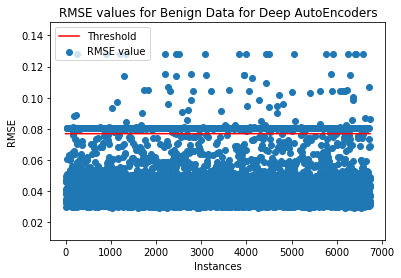

In [17]:
# threshold calcn
rdf = rmsedf[rmsedf['class'] == 0]
threshold = rdf['rmse'].mean() + 2 * rdf['rmse'].std()
print("threshold", threshold)

import matplotlib.pyplot as plt
df2 = rmsedf[rmsedf['class'] == 0]
k = range(1, len(df2) + 1)
plt.scatter(range(1, len(df2) + 1), df2['rmse'])
plt.plot(k, [threshold for _ in k], "r")
plt.xlabel("Instances")
plt.ylabel("RMSE")
plt.title("RMSE values for Benign Data for Deep AutoEncoders")
plt.legend(["Threshold","RMSE value"])
plt.show()

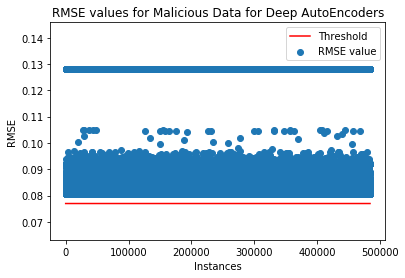

In [16]:
import matplotlib.pyplot as plt
df3 = rmsedf[rmsedf['class'] == 1]
k = range(1, len(df3) + 1)
plt.scatter(range(1, len(df3) + 1), df3['rmse'])
plt.plot(k, [threshold for _ in k], "r")
plt.xlabel("Instances")
plt.ylabel("RMSE")
plt.title("RMSE values for Malicious Data for Deep AutoEncoders")
plt.legend(["Threshold","RMSE value"])
plt.show()

# Test

In [12]:
# test
ypredtest = autoencoder.predict(XTest)
print(np.shape(ypredtest))
sbenign = 0
smal = 0
cbenign = 0
cmal = 0
l = []
n = len(XTest)
for i in range(n):
    temp = metrics.mean_squared_error(XTest[i], ypredtest[i]) ** 0.5
    l.append(temp)
    # l.append((temp)

print(np.shape(l))
n = len(XTest)

for i in range(n):
    if l[i] < threshold:
        l[i] = 0
    else:
        l[i] = 1

# print zip(l, yTest)

print(metrics.confusion_matrix(yTest, l))
print(metrics.classification_report(yTest, l))


(491108, 115)
(491108,)
[[  6021    712]
 [     0 484375]]
             precision    recall  f1-score   support

          0       1.00      0.89      0.94      6733
          1       1.00      1.00      1.00    484375

avg / total       1.00      1.00      1.00    491108

